In [3]:
%matplotlib

Using matplotlib backend: Qt5Agg


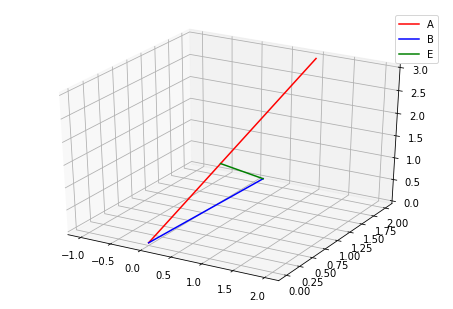

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_ortho(a, b):
    temp = np.linalg.inv(a.T.dot(a)).dot(b.T.dot(a))
    return a.dot(temp)

A = np.array([[1], [2], [3]])
B = np.array([[1], [1], [1]])
E = get_ortho(A, B)

fig = plt.figure()
ax = Axes3D(fig)

L = np.column_stack((np.zeros(3),A))
ax.plot(L[0], L[1], L[2], color='r', label='A')

L = np.column_stack((np.zeros(3),B))
ax.plot(L[0], L[1], L[2], color='b', label='B')

L = np.column_stack((B,E))
ax.plot(L[0], L[1], L[2], color='g', label='E')

plt.axis('equal')
plt.legend()
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#x的个数决定了样本量
x = np.arange(-1,1,0.02)
#y为理想函数
y = 2*np.sin(x*2.3)+5*x**2
#y1为离散的拟合数据
y1 = y+0.5*(np.random.rand(len(x))-0.5)


##################################
#主要程序
one=np.ones((len(x),1))#len(x)得到数据量
x=x.reshape(len(x),1)
x2=x*x
A=np.hstack((x2, x, one))#两个100x1列向量合并成100x2,(100, 1) (100,1 ) (100, 2)
C=y1.reshape(len(y1),1)
# print(A)
#等同于C=y1.reshape(100,1)
#虽然知道y1的个数为100但是程序中不应该出现人工读取的数据

def optimal(A,b):
    B = A.T.dot(b)
    AA = np.linalg.inv(A.T.dot(A))#求A.T.dot(A)的逆
    P=AA.dot(B)
    print(P)
    return A.dot(P)

#求得的[a,b]=P=[[  2.88778507e+00] [ -1.40062271e-04]]
yy = optimal(A,C)
#yy=P[0]*x+P[1]
##################################
plt.plot(x,y,color='g',linestyle='-',marker='',label=u'理想曲线')
plt.plot(x,y1,color='m',linestyle='',marker='o',label=u'拟合数据')
plt.plot(x,yy,color='b',linestyle='-',marker='.',label=u"拟合曲线")
# 把拟合的曲线在这里画出来
plt.legend(loc='upper left')
plt.show()

[[ 5.0988347 ]
 [ 2.53513966]
 [-0.04439976]]


[ 0.  -2.5  2.5]
[  0.  10.   0.]
[[-0.   1. ]
 [ 2.5  1. ]
 [-2.5  1. ]]
[ 2.          3.33333333]


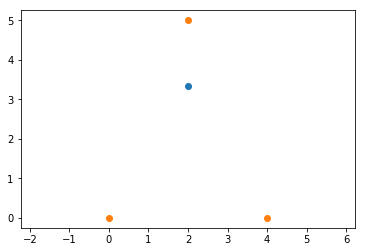

In [98]:
import matplotlib.pyplot as plt
import numpy as np

P = np.array([[0, 0], [4, 0], [2, 5]])
P1 = np.row_stack((P[1::,:], P[0,:]))
X,X1 = P[:,0],P1[:,0]
Y,Y1 = P[:,1],P1[:,1]
K = (Y1-Y)/(X1-X)
B = Y-K*X
print(K)
print(B)
# for i in range(len(K)):
#     lx = np.arange(0,2.5,0.02)
#     ly = lx*K[i]+B[i]
#     plt.plot(lx, ly)

one = np.ones(len(K))
A = np.column_stack((-K, one))
print(A)
def optimal(A,b):
    B = A.T.dot(b)
    AA = np.linalg.inv(A.T.dot(A))
    P=AA.dot(B)
    return P

P2 = optimal(A,B)
print(P2)
plt.plot(P2[0], P2[1], 'o')
plt.plot(X, Y, 'o')
plt.axis("equal")
plt.show()

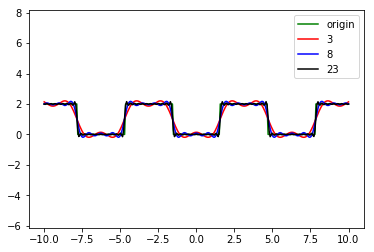

In [62]:
import numpy as np
import matplotlib.pyplot as plt  

def fourier(x, y, n):
    A = np.ones(len(x))
    for i in np.arange(n):
        A = np.column_stack((A, np.sin((i+1)*x)))
        A = np.column_stack((A, np.cos((i+1)*x)))
    K = optimal(A,y)
    return np.dot(A,K)
    
def optimal(A,b):
    B = A.T.dot(b)
    AA = np.linalg.inv(A.T.dot(A))
    P=AA.dot(B)
    return P
    
# 产生一个方波(x,y)
x = np.linspace(-10,10,300)
y=[]
for i in np.cos(x):
    if i>0:
        y.append(0)
    else:
        y.append(2)
y=np.array(y)

# write Your code, Fourier function
plt.plot(x,y,color='g',label='origin')
plt.plot(x,fourier(x,y,3),color='r',label='3')
plt.plot(x,fourier(x,y,8),color='b',label='8')
plt.plot(x,fourier(x,y,23),color='k',label='23')
# fourier(x,y,3)
plt.legend()
plt.axis('equal')
plt.show()

In [1]:
import numpy as np  
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def generator():
    x = np.array([[2], [1]])
    n = 120
    p1 = [[],[]]
    p2 = [[],[]]
    for i in range(0, n):
        a = math.radians(360/n*i)
        Z = [[math.cos(a), -math.sin(a)], [math.sin(a), math.cos(a)]]
        x2 = np.dot(Z, x)
        y2 = np.dot(A, x2)
        p1[0].append(x2[0][0])
        p1[1].append(x2[1][0])
        p2[0].append(y2[0][0])
        p2[1].append(y2[1][0])
        data = [p1, p2]
        yield data
        
def update(datag):
    fig_points.set_data(datag[0][0], datag[0][1])
    fig_points2.set_data(datag[1][0], datag[1][1])
    return fig_points

A=np.array([[3,1],[2,4]])/4.0

fig = plt.figure()

fig_points, = plt.plot([], [], 'r.')
fig_points2, = plt.plot([], [], 'b.')
plt.axis('equal')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
ani = animation.FuncAnimation(fig, update, generator, interval=50,repeat=False)
# plt.show()
ani.save("animtz.gif", writer="imagemagick")